In [2]:
import xarray as xr
import proplot as plot

In [22]:
err1 = xr.open_dataset('zg500_CanESM2_amip-bias-cor_vs_CNRM_198101-200012.nc').ERR
err2 = xr.open_dataset('zg500_CanESM2_amip-bias-cor_vs_CNRM_208101-210012.nc').ERR
err3 = xr.open_dataset('zg500_CanESM2_amip-free_vs_CNRM_198101-200012.nc').ERR
err4 = xr.open_dataset('zg500_CanESM2_amip-free_vs_CNRM_208101-210012.nc').ERR

In [35]:
err2

<xarray.DataArray 'ERR' (PLEV: 1, LAT: 64, LON: 128)>
array([[[-0.805664, -0.545898, ..., -1.379883, -1.091309],
        [ 5.121582,  4.938477, ...,  5.069336,  5.157227],
        ...,
        [19.01416 , 19.012695, ..., 18.91504 , 18.987793],
        [20.099121, 20.07129 , ..., 20.235352, 20.183105]]], dtype=float32)
Coordinates:
  * LON      (LON) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * LAT      (LAT) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * PLEV     (PLEV) float64 5e+04
Attributes:
    long_name:  ZG[D=1,L=1201:1440@AVE]-ZG[D=3,L=1201:1440@AVE,GX=ZG[D=1],GY=...

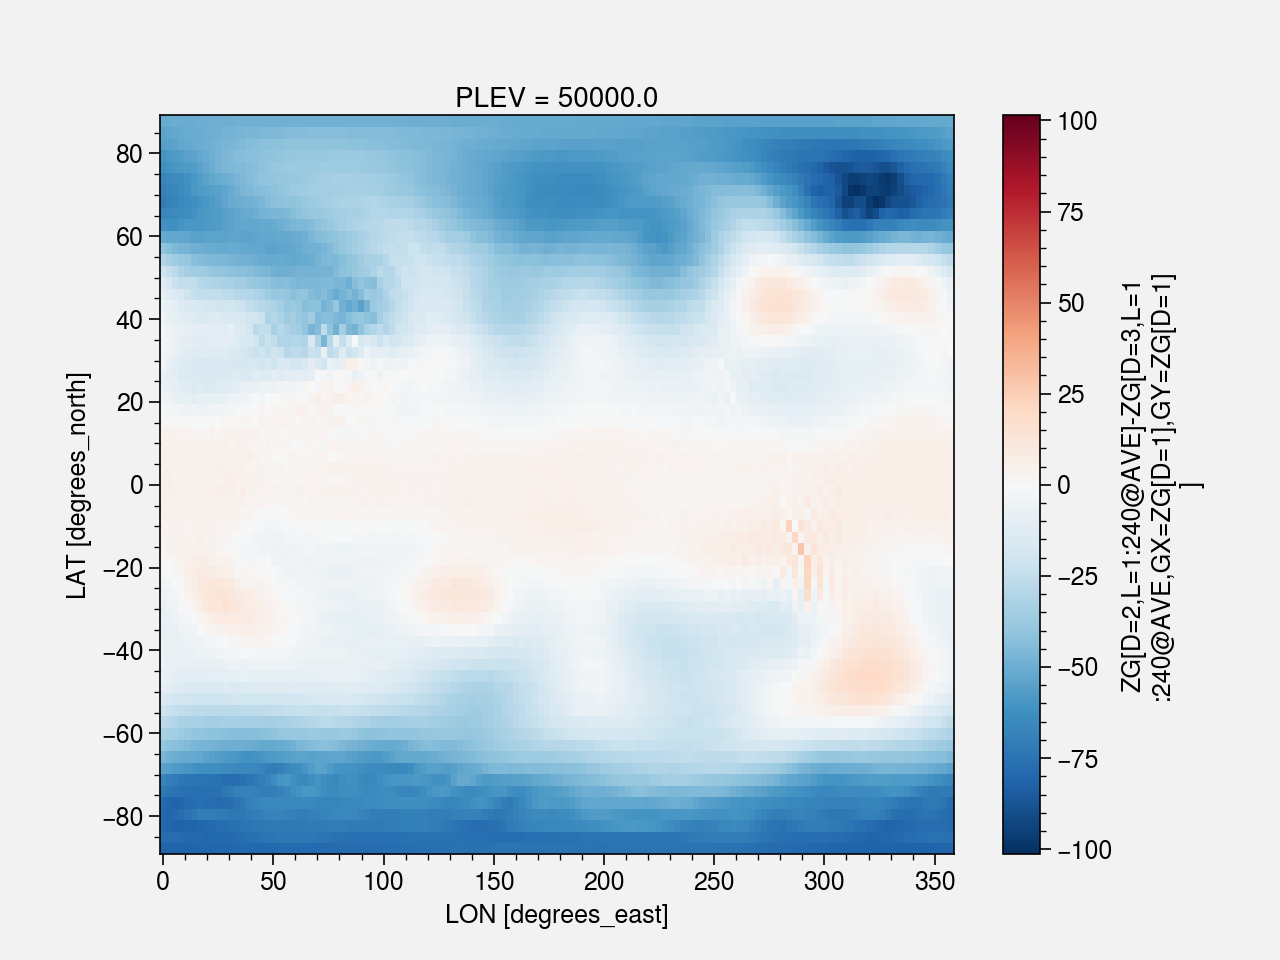

In [28]:
err3.plot()

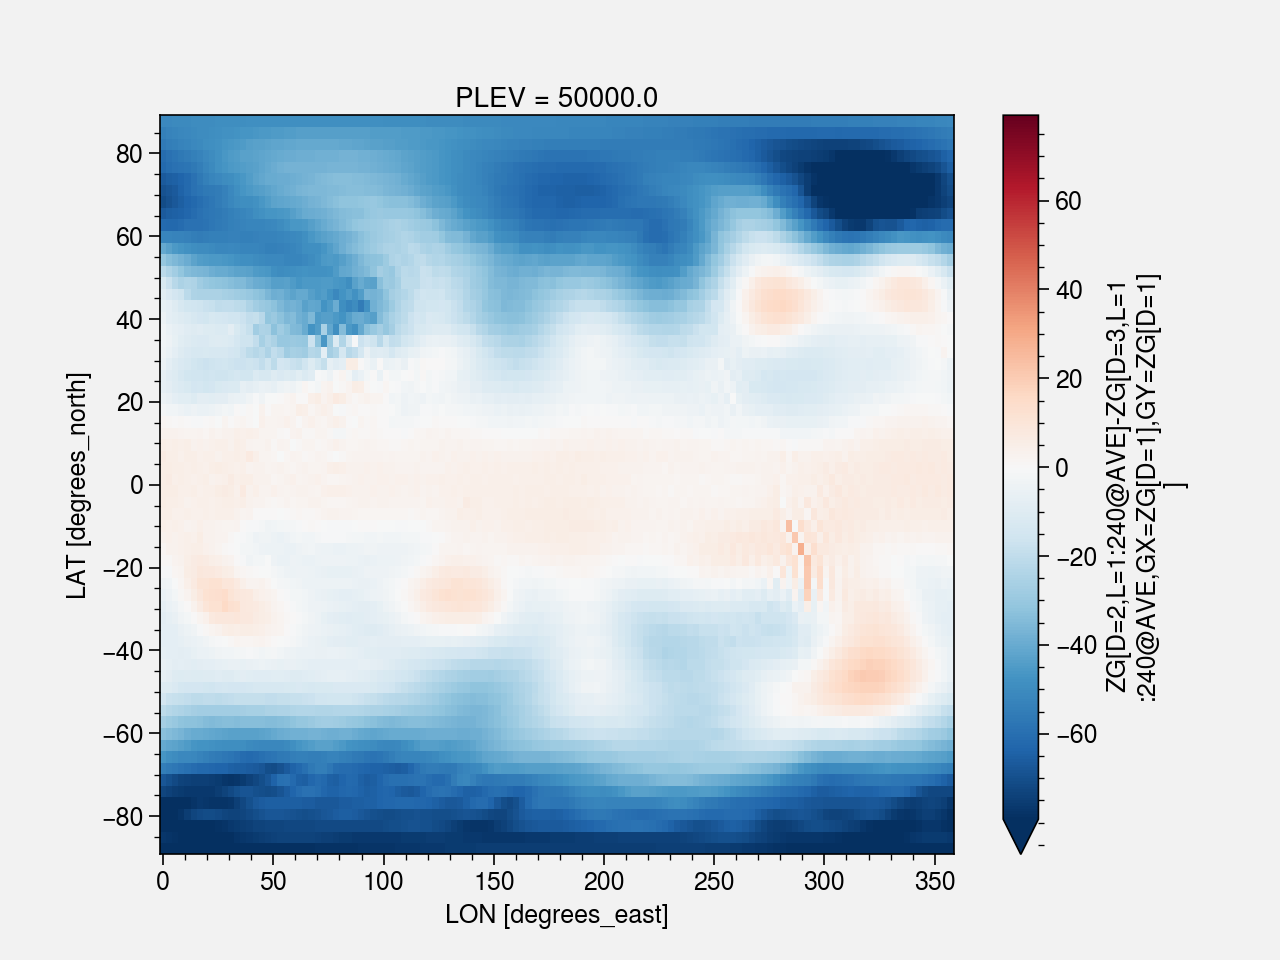

In [39]:
err3.plot(robust=True)

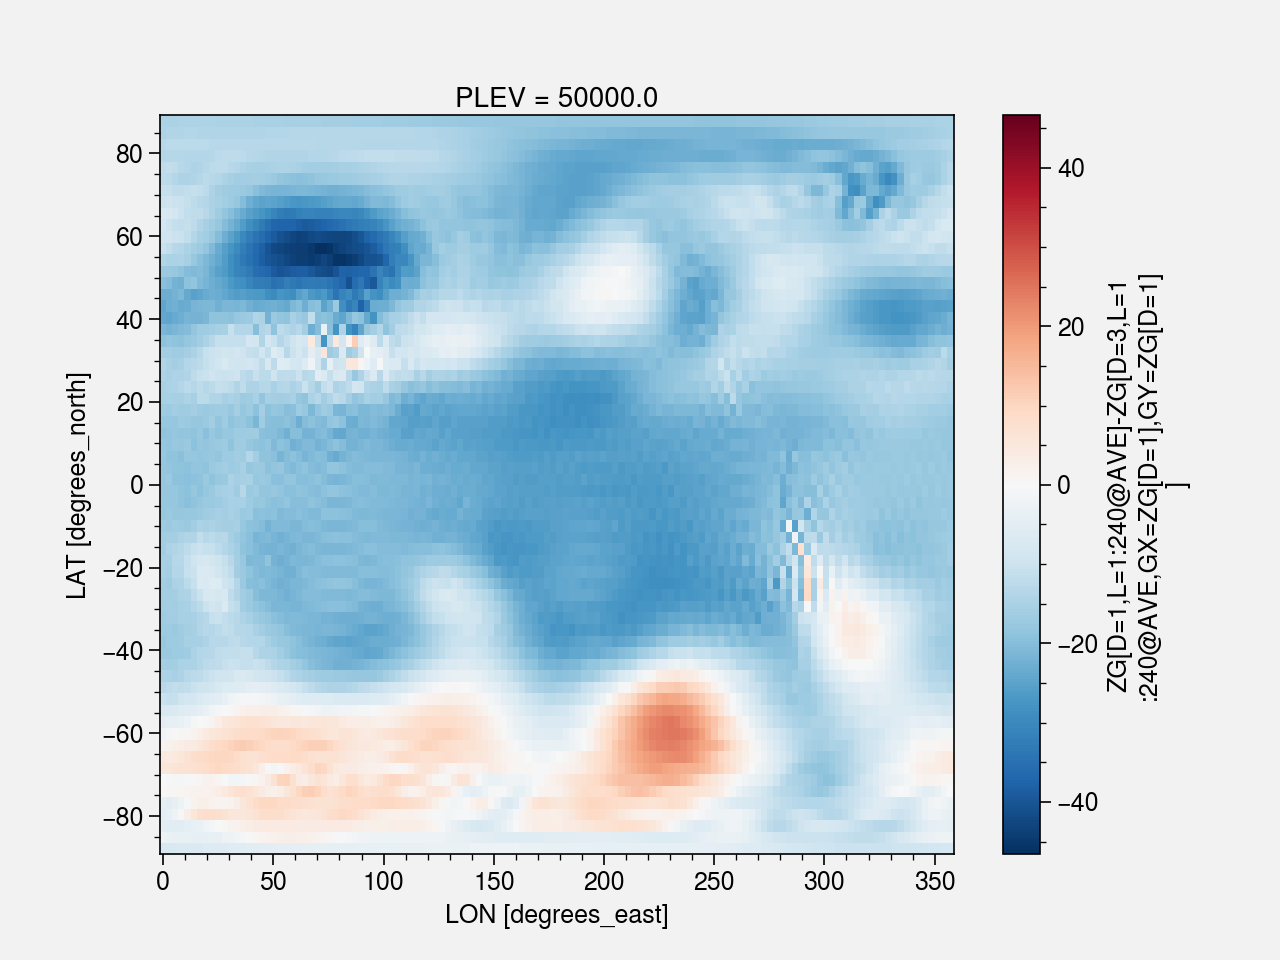

In [26]:
err1.plot()

/home/lalandmi/miniconda3/lib/python3.7/site-packages/proplot/utils.py:105: ProPlotWarning: Cannot add gridline labels to cartopy Robinson projection.
/home/lalandmi/miniconda3/lib/python3.7/site-packages/proplot/utils.py:105: ProPlotWarning: Cannot add gridline labels to cartopy Robinson projection.
/home/lalandmi/miniconda3/lib/python3.7/site-packages/proplot/utils.py:105: ProPlotWarning: Cannot add gridline labels to cartopy Robinson projection.
/home/lalandmi/miniconda3/lib/python3.7/site-packages/proplot/utils.py:105: ProPlotWarning: Cannot add gridline labels to cartopy Robinson projection.


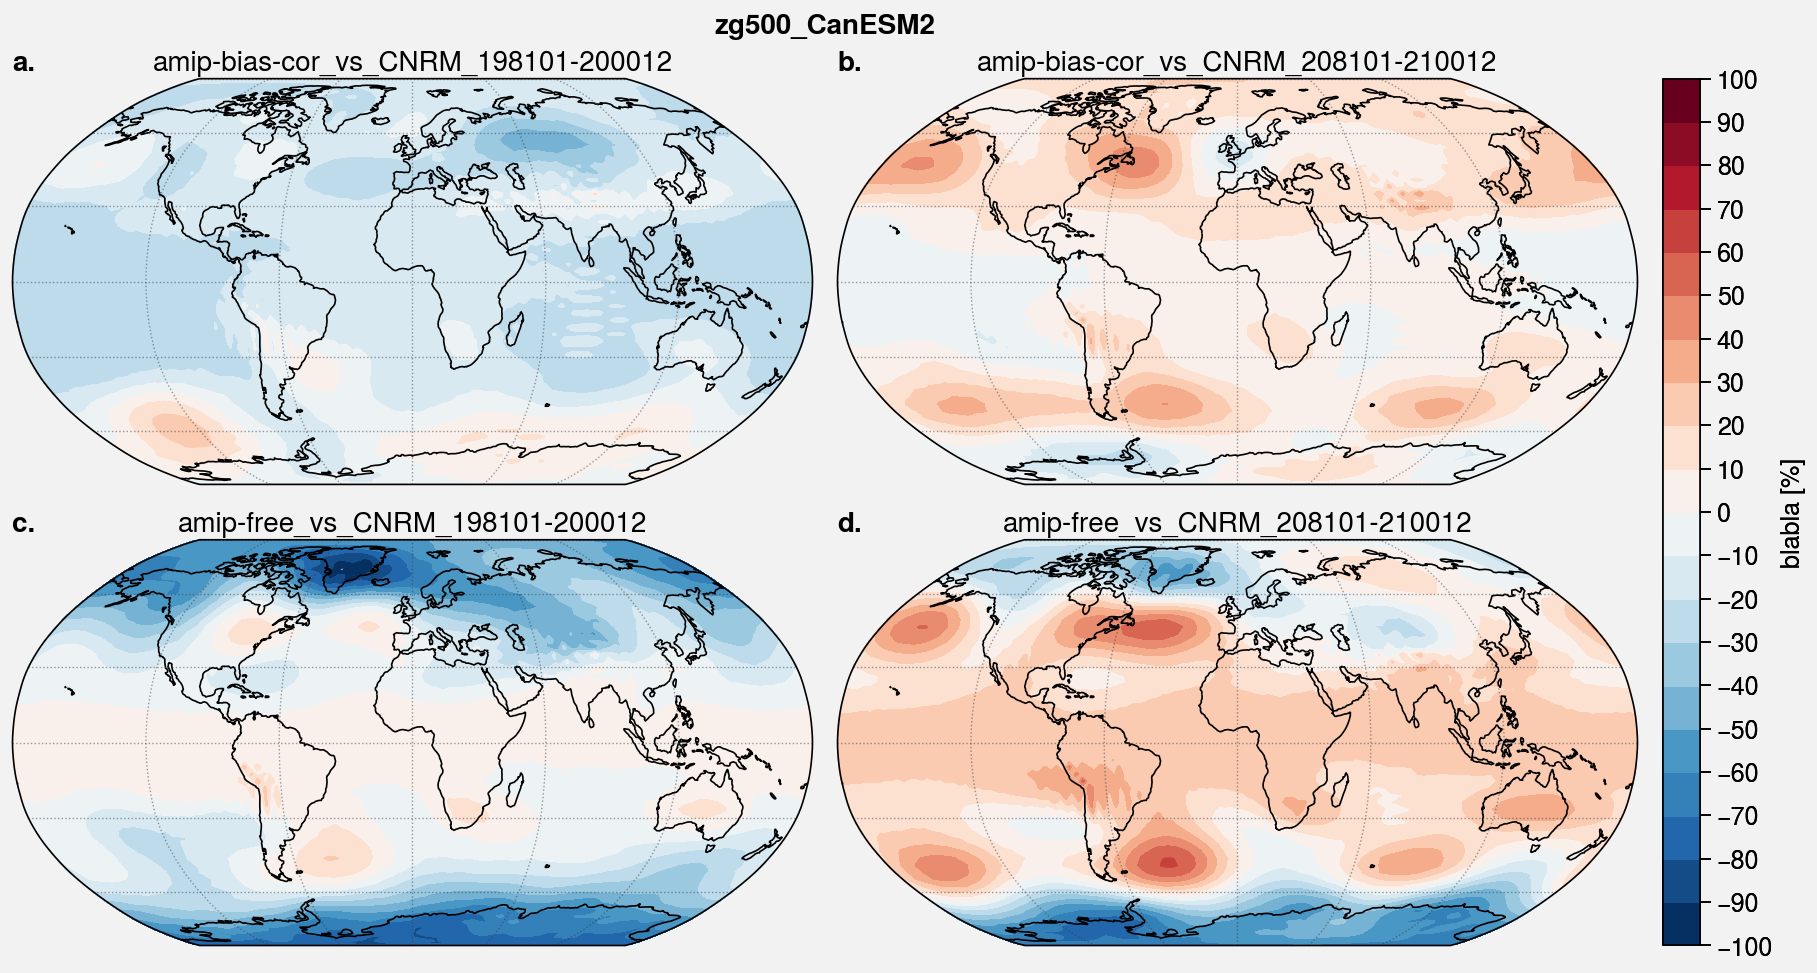

In [38]:
errs = [err1, err2, err3, err4]

titles = [
    'amip-bias-cor_vs_CNRM_198101-200012',
    'amip-bias-cor_vs_CNRM_208101-210012',
    'amip-free_vs_CNRM_198101-200012',
    'amip-free_vs_CNRM_208101-210012'
]

f, axs = plot.subplots(nrows=2, ncols=2, proj='robin', axwidth=4)

for i, ax in enumerate(axs):
    m = ax.contourf(
        errs[i][0], cmap='RdBu_r', globe=True,
#         colorbar='r', norm='midpoint', # pour une colorbar par plot
        levels=plot.arange(-100, 100, 10)        
    )
    ax.format(title=titles[i])
    
f.colorbar(m, label="blabla [%]")

axs.format(
    labels=True, # ne fonctionne pas encore avec Cartopy
    coast=True, geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5,
    lonlines=60, latlines=30, 
    abc=True, abcstyle='a.',
    suptitle="zg500_CanESM2"
)

f.save('test.pdf')